# Organize data for 3rd experiment on authorship attribution

### This time using only 2 authors (authorship verification) from the Kaggle Authorship Corpus

In [8]:
import pandas as pd
import os


In [9]:
PATH =  '/Users/joaopedropadua/.cache/kagglehub/datasets/rtatman/blog-authorship-corpus/versions/2'

In [3]:
# List the files in the downloaded directory
print("Files in the dataset:")
for file in os.listdir(PATH):
    print(f"- {file}")


Files in the dataset:
- blogtext.csv


In [10]:
# Load data

df = pd.read_csv(os.path.join(PATH, 'blogtext.csv'))

df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [11]:
# Make a new DataFrame with only the 2 authors with the most posts

df_2_authors = df.groupby('id').size().sort_values(ascending=False).head(2).index

df_2_authors = df[df['id'].isin(df_2_authors)]

print("First few rows of the new DataFrame:")
display(df_2_authors.head())
print("--------------------------------\n")
print("Shape of the new DataFrame:")
df_2_authors.shape
print("\n--------------------------------\n")
#Check if there are only 2 authors
print("How many authors are in the new DataFrame?")
display(df_2_authors['id'].nunique())
print("--------------------------------\n")
# Check the number of posts for each author
print("How many posts does each author have?")
display(df_2_authors['id'].value_counts())
print("--------------------------------\n")

First few rows of the new DataFrame:


,id,gender,age,topic,sign,date,text
235798,449628,male,34,indUnk,Aries,"31,July,2002",Update I've added links to other web...
235799,449628,male,34,indUnk,Aries,"25,July,2002",Welcome to Get That Job! This is the...
235800,449628,male,34,indUnk,Aries,"30,August,2002",Viva La Library! Your local public l...
235801,449628,male,34,indUnk,Aries,"29,August,2002",Credential Files: Make your transcript...
235802,449628,male,34,indUnk,Aries,"23,August,2002",urlLink University of Cincinnati Care...


--------------------------------

Shape of the new DataFrame:

--------------------------------

How many authors are in the new DataFrame?


2

--------------------------------

How many posts does each author have?


id
449628    4221
734562    2301
Name: count, dtype: int64

--------------------------------



In [30]:
# Save the DataFrame to a pickle file
#df_2_authors.to_pickle('./data/authorship_verification_kaggle_data_2.pkl')


In [12]:
# Create a traning set with 80% of the data and a test set with 20% of the data
df_2_authors_train = df_2_authors.sample(frac=0.8, random_state=42)
df_2_authors_test = df_2_authors.drop(df_2_authors_train.index)

# Save the training and test sets to pickle files
# df_2_authors_train.to_pickle('./data/authorship_verification_kaggle_data_2_train.pkl')
# df_2_authors_test.to_pickle('./data/authorship_verification_kaggle_data_2_test.pkl')

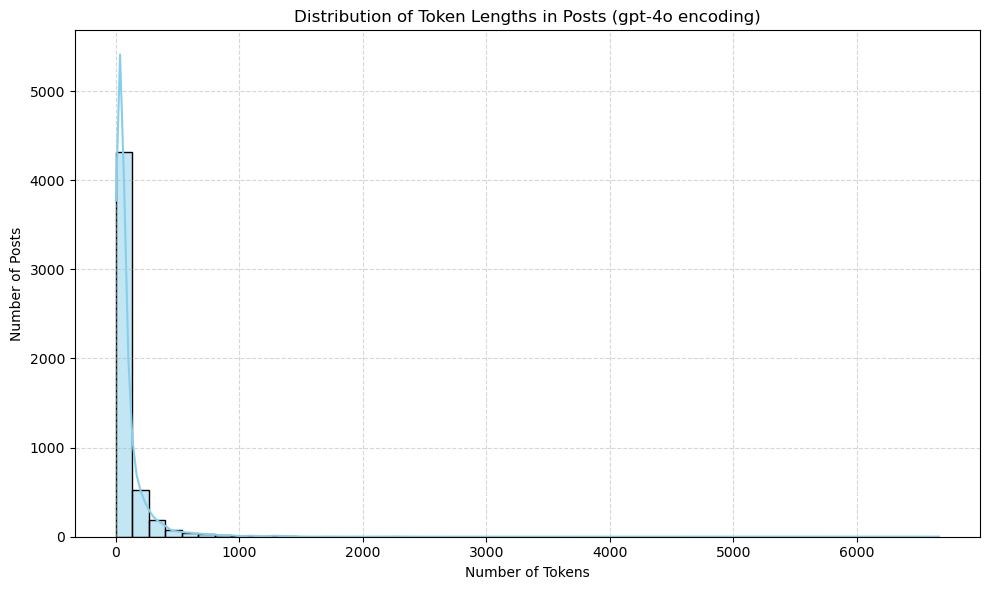

Average number of tokens per post: 94.15
Standard deviation of tokens per post: 182.54
Minimum number of tokens per post: 1
Maximum number of tokens per post: 6664


In [15]:
# Check the number of tokens in each post of the training set

import tiktoken
import matplotlib.pyplot as plt
import seaborn as sns

# Load the GPT-4o encoding
encoding = tiktoken.get_encoding("cl100k_base")

# Function to count tokens in a string
def count_tokens(text):
    return len(encoding.encode(text))

# Calculate token counts for each post
token_counts = df_2_authors_train["text"].apply(count_tokens)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(token_counts, bins=50, kde=True, color='skyblue')
plt.title("Distribution of Token Lengths in Posts (gpt-4o encoding)")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Posts")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print the average number of tokens per post
average_tokens = token_counts.mean()
std_tokens = token_counts.std()
print(f"Average number of tokens per post: {average_tokens:.2f}")
print(f"Standard deviation of tokens per post: {std_tokens:.2f}")

# Print the minimum and maximum number of tokens per post
print(f"Minimum number of tokens per post: {token_counts.min()}")
print(f"Maximum number of tokens per post: {token_counts.max()}")


Shapiro-Wilk test statistic: 0.978, p-value: 1.12e-27
The log-transformed data does not look normal (reject H0).
Keep in mind that the Shapiro-Wilk test is sensitive to sample size, and we have a lot of data (n > 4000).


/Users/joaopedropadua/anaconda3/envs/cup/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5218.
  res = hypotest_fun_out(*samples, **kwds)


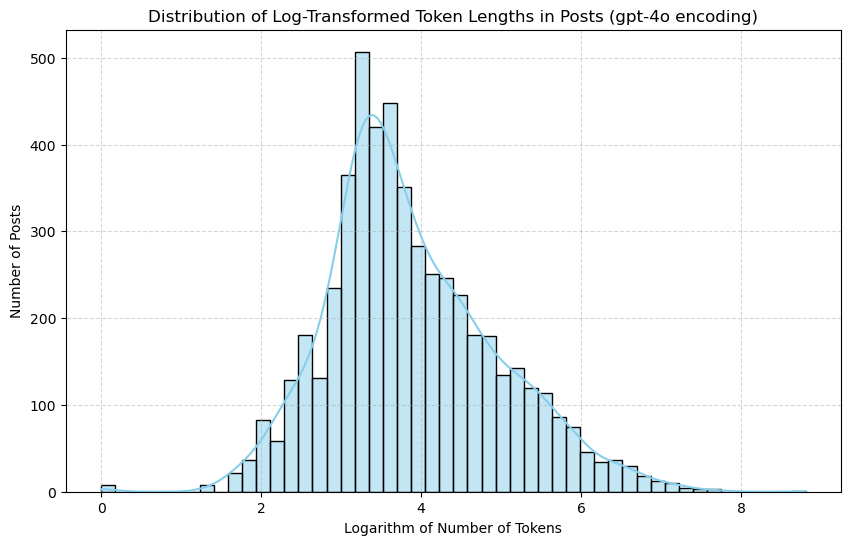

In [27]:
# Just for the sake of curiosity, let's test whether the token length distribution
# is log-normal
import numpy as np
from scipy.stats import shapiro

# Calculate log-transformed token counts
log_token_counts = np.log(token_counts)

# Plot the log-transformed token counts
plt.figure(figsize=(10, 6))
sns.histplot(log_token_counts, bins=50, kde=True, color='skyblue')
plt.title("Distribution of Log-Transformed Token Lengths in Posts (gpt-4o encoding)")
plt.xlabel("Logarithm of Number of Tokens")
plt.ylabel("Number of Posts")
plt.grid(True, linestyle='--', alpha=0.5)

#Use the Shapiro-Wilk test to check if the log-transformed token counts are normally distributed
stat, p = shapiro(log_token_counts)
print(f"Shapiro-Wilk test statistic: {stat:.3f}, p-value: {p:.3g}")
if p > 0.05:
   print("The log-transformed data looks normal (fail to reject H0).")
else:
   print("The log-transformed data does not look normal (reject H0).")
print("Keep in mind that the Shapiro-Wilk test is sensitive to sample size, and we have a lot of data (n > 4000).")



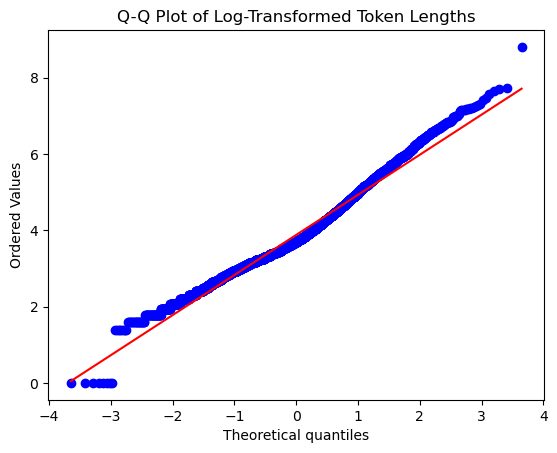

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(log_token_counts, dist="norm", plot=plt)
plt.title("Q-Q Plot of Log-Transformed Token Lengths")
plt.show()

### Parameters for creating the prompt for the authorship verification / classification phase

The number of posts you can include in a single prompt for an LLM (like GPT-4o) depends on:
The model’s context window (maximum tokens per prompt)
The average number of tokens per post (which you found to be ~94)
Any additional tokens used for instructions, formatting, or other prompt content
The expected length of the model’s output (if you want a response)
1. Context Window for GPT-4o
As of June 2024, GPT-4o supports up to 128,000 tokens per prompt (for the API), but many public endpoints and playgrounds may have lower limits (e.g., 8,192 or 32,768 tokens).
Check your specific API or interface for the exact limit.
2. Calculating the Number of Posts
Let’s assume a 32,768 token context window (a common high limit for GPT-4o API users):
Reserve tokens for instructions and output:
Let’s reserve 768 tokens for instructions, formatting, and the model’s response.
Tokens available for posts:
32
,
768
−
768
=
32
,
000
32,768−768=32,000 tokens
Average tokens per post:
94 tokens
Maximum number of posts:
Number of posts
=
32
,
000
94
≈
340
Number of posts= 
94
32,000
​
 ≈340
3. Adjust for Your Use Case
If you need a longer response, reserve more tokens for output.
If your context window is smaller (e.g., 8,192 tokens), recalculate accordingly:
(
8
,
192
−
192
)
/
94
≈
85
 posts
(8,192−192)/94≈85 posts